# WeatherPy
----

## Analysis
* There is storng correation between latitude and maximum temperature. The temperature increases towards the equator from both north and south poles. Both r-value and scatter plot analysis show this.
* There is only weak correlation between latitude and humidity in northern and southern hemispheres.
* There is only weak correlation between latitude and cloudiness in northern and southern hemispheres.
* There is only weak correlation between latitude and wind speed in northern and southern hemispheres.

In [232]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Output File (CSV)
output_data_folder = os.path.join("..","OutputData")
output_data_file = os.path.join(output_data_folder, "cities.csv")

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [229]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [230]:
# Base url
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&q="
api_key = "&appid="
weather_list = []
count = 0

print("Data retrieval starts")
print("======================")

# Iterate through cities and request weather data
for city in cities:
    try:
        count += 1
        weather_dict = {}

        weather_resp = requests.get(url + city + api_key + weather_api_key).json()
        
        print("Processing weather data of city " + str(count) + " and city name is: " + city)
        weather_dict["City"] = city
        weather_dict["Lat"] = weather_resp["coord"]["lat"]
        weather_dict["Lng"] =  weather_resp["coord"]["lon"]
        weather_dict["Max Temp"] =  weather_resp["main"]["temp_max"]
        weather_dict["Humidity"] =  weather_resp["main"]["humidity"]
        weather_dict["Cloudiness"] =  weather_resp["clouds"]["all"]
        weather_dict["Wind Speed"] =  weather_resp["wind"]["speed"]
        weather_dict["Country"] =  weather_resp["sys"]["country"]
        weather_dict["Date"] =  weather_resp["dt"]
        
        weather_list.append(weather_dict)

    except:
        print("Error in processing weather data of " + city)
        pass
print("Data retrieval complete")
print("========================")

Data retrieval starts
Processing weather data of city 1 and city name is: praia da vitoria
Processing weather data of city 2 and city name is: jamestown
Processing weather data of city 3 and city name is: mount isa
Processing weather data of city 4 and city name is: kerema
Processing weather data of city 5 and city name is: amderma
Error in processing weather data of amderma
Processing weather data of city 6 and city name is: flinders
Processing weather data of city 7 and city name is: nikolskoye
Processing weather data of city 8 and city name is: mataura
Processing weather data of city 9 and city name is: saldanha
Processing weather data of city 10 and city name is: koungou
Processing weather data of city 11 and city name is: san cristobal
Processing weather data of city 12 and city name is: howard springs
Processing weather data of city 13 and city name is: guaymas
Processing weather data of city 14 and city name is: ribeira brava
Processing weather data of city 15 and city name is: 

Processing weather data of city 123 and city name is: mar del plata
Processing weather data of city 124 and city name is: mayor pablo lagerenza
Processing weather data of city 125 and city name is: buin
Processing weather data of city 126 and city name is: pangnirtung
Processing weather data of city 127 and city name is: georgetown
Processing weather data of city 128 and city name is: east london
Processing weather data of city 129 and city name is: atlantic city
Processing weather data of city 130 and city name is: puerto ayora
Processing weather data of city 131 and city name is: lusambo
Processing weather data of city 132 and city name is: calama
Processing weather data of city 133 and city name is: shimoda
Processing weather data of city 134 and city name is: ponta delgada
Processing weather data of city 135 and city name is: bengkulu
Processing weather data of city 136 and city name is: cermik
Processing weather data of city 137 and city name is: katsuura
Processing weather data o

Processing weather data of city 245 and city name is: tosya
Processing weather data of city 246 and city name is: kruisfontein
Processing weather data of city 247 and city name is: manyana
Processing weather data of city 248 and city name is: dabakala
Processing weather data of city 249 and city name is: pavlodar
Processing weather data of city 250 and city name is: tumannyy
Error in processing weather data of tumannyy
Processing weather data of city 251 and city name is: skalistyy
Error in processing weather data of skalistyy
Processing weather data of city 252 and city name is: lipin bor
Processing weather data of city 253 and city name is: sunzha
Processing weather data of city 254 and city name is: dingle
Processing weather data of city 255 and city name is: iskilip
Processing weather data of city 256 and city name is: los llanos de aridane
Processing weather data of city 257 and city name is: port hawkesbury
Processing weather data of city 258 and city name is: menongue
Processing

Processing weather data of city 369 and city name is: walvis bay
Processing weather data of city 370 and city name is: dianopolis
Error in processing weather data of dianopolis
Processing weather data of city 371 and city name is: kavaratti
Processing weather data of city 372 and city name is: kidal
Processing weather data of city 373 and city name is: duekoue
Processing weather data of city 374 and city name is: lagoa
Processing weather data of city 375 and city name is: mnogovershinnyy
Processing weather data of city 376 and city name is: rudnyy
Processing weather data of city 377 and city name is: norman wells
Processing weather data of city 378 and city name is: faya
Processing weather data of city 379 and city name is: black river
Processing weather data of city 380 and city name is: la asuncion
Processing weather data of city 381 and city name is: abalak
Processing weather data of city 382 and city name is: luderitz
Processing weather data of city 383 and city name is: shimanovsk

Processing weather data of city 492 and city name is: saint-joseph
Processing weather data of city 493 and city name is: lobatse
Processing weather data of city 494 and city name is: turukhansk
Processing weather data of city 495 and city name is: bodden town
Processing weather data of city 496 and city name is: tazovskiy
Processing weather data of city 497 and city name is: syamzha
Processing weather data of city 498 and city name is: dalinghe
Error in processing weather data of dalinghe
Processing weather data of city 499 and city name is: iwanai
Processing weather data of city 500 and city name is: san patricio
Processing weather data of city 501 and city name is: porbandar
Processing weather data of city 502 and city name is: kabompo
Processing weather data of city 503 and city name is: bay roberts
Processing weather data of city 504 and city name is: coihaique
Processing weather data of city 505 and city name is: la calera
Processing weather data of city 506 and city name is: redl

Processing weather data of city 618 and city name is: anchorage
Processing weather data of city 619 and city name is: rudnya
Processing weather data of city 620 and city name is: bulgan
Processing weather data of city 621 and city name is: itapipoca
Processing weather data of city 622 and city name is: verkh-usugli
Processing weather data of city 623 and city name is: eskasem
Error in processing weather data of eskasem
Processing weather data of city 624 and city name is: olinda
Processing weather data of city 625 and city name is: svetlogorsk
Processing weather data of city 626 and city name is: antalaha
Data retrieval complete


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [233]:
# Create OutputData folder if it does not exist
if not os.path.exists(output_data_folder):
    os.makedirs(output_data_folder)

# Create data frame and save to csv
city_df = pd.DataFrame(weather_list)
city_df.to_csv(output_data_file, index=False)
city_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,praia da vitoria,38.7333,-27.0667,73.76,73,75,16.08,PT,1624107210
1,jamestown,42.0970,-79.2353,73.02,87,1,4.00,US,1624106971
2,mount isa,-20.7333,139.5000,47.97,49,5,0.00,AU,1624107212
3,kerema,-7.9631,145.7785,78.08,86,100,6.78,PG,1624107214
4,flinders,-34.5833,150.8552,56.21,77,100,10.00,AU,1624107216
...,...,...,...,...,...,...,...,...,...
572,itapipoca,-3.4944,-39.5786,85.48,53,97,8.19,BR,1624107827
573,verkh-usugli,52.7000,115.1667,49.10,95,27,4.63,RU,1624108095
574,olinda,-8.0089,-34.8553,73.13,83,75,6.91,BR,1624108098
575,svetlogorsk,52.6333,29.7333,81.12,53,34,9.40,BY,1624108100


In [236]:
city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,5.770000e+02
mean,20.992849,17.503166,70.482790,66.098787,59.149047,8.077470,1.624108e+09
std,32.687522,89.603368,16.022821,23.247736,40.221504,5.452345,2.616213e+02
min,-54.800000,-179.166700,31.500000,4.000000,0.000000,0.000000,1.624107e+09
25%,-4.483300,-59.516700,57.760000,52.000000,16.000000,3.980000,1.624107e+09
50%,25.116700,19.853600,74.010000,73.000000,75.000000,7.250000,1.624108e+09
75%,49.633400,98.250000,81.280000,84.000000,100.000000,11.270000,1.624108e+09
max,78.218600,179.316700,113.700000,100.000000,100.000000,32.610000,1.624108e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [237]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
clean_city_df = city_df.drop(city_df.loc[city_df["Humidity"] > 100].index)
clean_city_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,praia da vitoria,38.7333,-27.0667,73.76,73,75,16.08,PT,1624107210
1,jamestown,42.0970,-79.2353,73.02,87,1,4.00,US,1624106971
2,mount isa,-20.7333,139.5000,47.97,49,5,0.00,AU,1624107212
3,kerema,-7.9631,145.7785,78.08,86,100,6.78,PG,1624107214
4,flinders,-34.5833,150.8552,56.21,77,100,10.00,AU,1624107216
...,...,...,...,...,...,...,...,...,...
572,itapipoca,-3.4944,-39.5786,85.48,53,97,8.19,BR,1624107827
573,verkh-usugli,52.7000,115.1667,49.10,95,27,4.63,RU,1624108095
574,olinda,-8.0089,-34.8553,73.13,83,75,6.91,BR,1624108098
575,svetlogorsk,52.6333,29.7333,81.12,53,34,9.40,BY,1624108100


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [238]:
# Function to draw and save scatter plots
def plotscatter(x_values, y_values, ylabel, figname, title):
    plt.scatter(x_values, y_values, edgecolors="black", alpha=0.75)
    day = datetime.fromtimestamp(clean_city_df.loc[0,"Date"]).date()
    plt.title(title + " (" + str(day) + ")")
    plt.grid()
    plt.xlabel("Latitude")
    plt.ylabel(ylabel)
    output_fig = os.path.join(output_data_folder, figname)
    plt.savefig(output_fig);

## Latitude vs. Temperature Plot

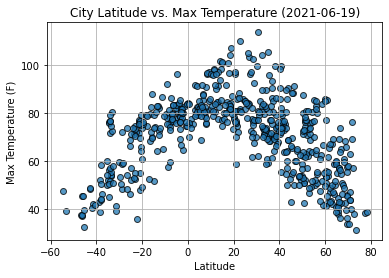

In [239]:
plotscatter(clean_city_df['Lat'], clean_city_df["Max Temp"], 
            "Max Temperature (F)", "Lat_vs_Temp",
            "City Latitude vs. Max Temperature")

As per the Latitude vs. Max Temperature scatter plot, maximum tempetature increases towards the equator and decreases towards the poles.

## Latitude vs. Humidity Plot

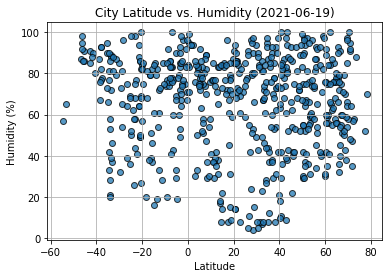

In [241]:
plotscatter(clean_city_df['Lat'], clean_city_df["Humidity"],
            "Humidity (%)", "Lat_vs_Humidity",
            "City Latitude vs. Humidity")

There is no correlation between latitude and humidity as per Latitude vs. Humidity scatter plot.

## Latitude vs. Cloudiness Plot

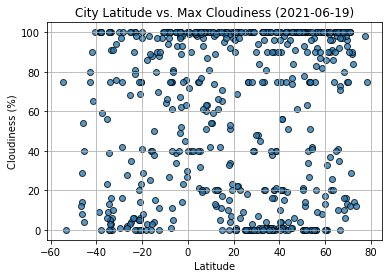

In [242]:
plotscatter(clean_city_df['Lat'], clean_city_df["Cloudiness"], 
           "Cloudiness (%)", "Lat_vs_Cloudiness",
            "City Latitude vs. Max Cloudiness")

There is no correlation between latitude and cloudiness as per Latitude vs. Cloudiness scatter plot.

## Latitude vs. Wind Speed Plot

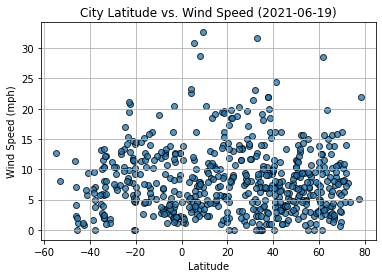

In [243]:
plotscatter(clean_city_df['Lat'], clean_city_df["Wind Speed"], 
            "Wind Speed (mph)", "Lat_vs_WindSpeed",
            "City Latitude vs. Wind Speed")

There is no correlation between latitude and wind speed as per Latitude vs. Wind Speed scatter plot.

## Linear Regression

In [245]:
# Separate cities based on hemisphere
north_city_df = clean_city_df.loc[clean_city_df["Lat"] >= 0 ]
south_city_df = clean_city_df.loc[clean_city_df["Lat"] < 0 ]

In [255]:
# Function to draw scatter plot and linear regression
def plotscatter_regress(x_values, y_values, ylabel, title, figname, x, y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x,y),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(ylabel)
    plt.title(title)
    
    # Save plot figure
    output_fig = os.path.join(output_data_folder, figname)
    plt.savefig(output_fig);

    print(f"The r-value is: {round(rvalue,2)}")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.7


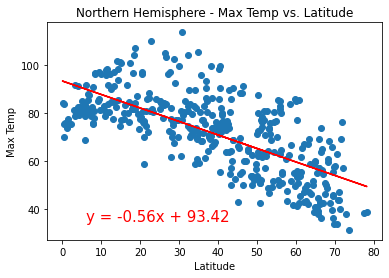

In [256]:
plotscatter_regress(north_city_df['Lat'],
                    north_city_df['Max Temp'],
                    'Max Temp', "Northern Hemisphere - Max Temp vs. Latitude",
                    "NorthHem_Lat_vs_MaxTemp", 6,35)

An r-value of -0.7 indicates that there is strong negative correlation between latitude and maximum temperature in northern hemisphere as latitude changes towards the pole. Scatter plot also depicts the same. The temperature decreases from equator to north pole.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.76


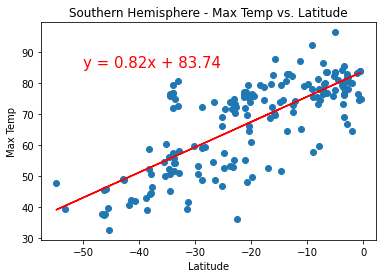

In [257]:
plotscatter_regress(south_city_df['Lat'],
                    south_city_df['Max Temp'],
                    'Max Temp', "Southern Hemisphere - Max Temp vs. Latitude",
                    "SouthHem_Lat_vs_MaxTemp", -50,85)

An r-value of 0.76 indicates that there is strong positive correlation between latitude and maximum temperature in southern hemisphere as latitude changes towards the equator. Scatter plot also depicts the same. The temperature increases from south pole to equator.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.02


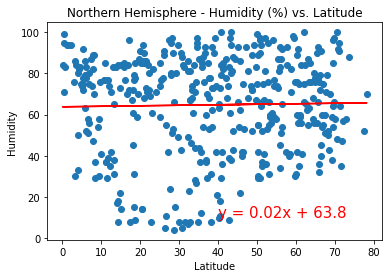

In [258]:
plotscatter_regress(north_city_df['Lat'],
                    north_city_df['Humidity'],
                    'Humidity', "Northern Hemisphere - Humidity (%) vs. Latitude",
                    "NorthHem_Lat_vs_Humidity", 40,10)

An r-value of 0.02 indcates that there is weak correlation between latitude and humidity in northern hemisphere. Scatter plot also depicts the same.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.06


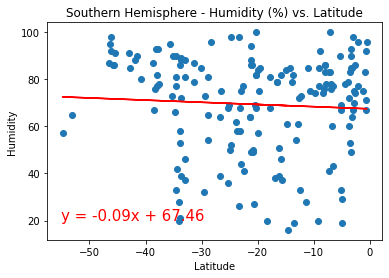

In [259]:
plotscatter_regress(south_city_df['Lat'],
                    south_city_df['Humidity'],
                    'Humidity', "Southern Hemisphere - Humidity (%) vs. Latitude",
                    "SouthHem_Lat_vs_Humidity", -55,20)

An r-value of -0.06 indcates that there is weak correlation between latitude and humidity in southern hemisphere. Scatter plot also depicts the same.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.06


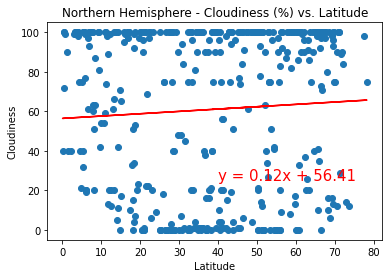

In [260]:
plotscatter_regress(north_city_df['Lat'],
                    north_city_df['Cloudiness'],
                    'Cloudiness', "Northern Hemisphere - Cloudiness (%) vs. Latitude",
                    "NorthHem_Lat_vs_Cloudiness", 40,25)

An r-value of 0.06 indcates that there is weak correlation between latitude and cloudiness in northern hemisphere. Scatter plot also depicts the same.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.24


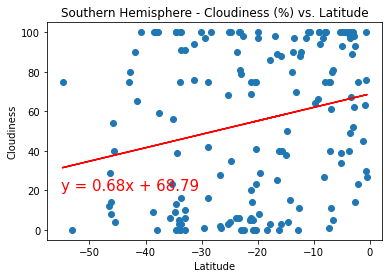

In [261]:
plotscatter_regress(south_city_df['Lat'],
                    south_city_df['Cloudiness'],
                    'Cloudiness', "Southern Hemisphere - Cloudiness (%) vs. Latitude",
                    "SouthHem_Lat_vs_Cloudiness", -55,20)

An r-value of 0.24 indcates that there is weak correlation between latitude and cloudiness in southern hemisphere. Scatter plot also depicts the same.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.09


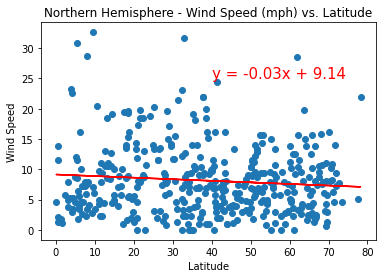

In [262]:
plotscatter_regress(north_city_df['Lat'],
                    north_city_df['Wind Speed'],
                    'Wind Speed', "Northern Hemisphere - Wind Speed (mph) vs. Latitude",
                    "NorthHem_Lat_vs_Wind Speed", 40,25)

An r-value of -0.09 indcates that there is weak correlation between latitude and wind speed in northern hemisphere. Scatter plot also depicts the same.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.09


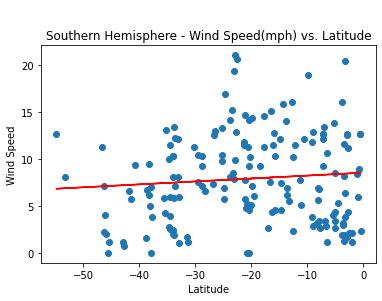

In [263]:
plotscatter_regress(south_city_df['Lat'],
                    south_city_df['Wind Speed'],
                    'Wind Speed', "Southern Hemisphere - Wind Speed(mph) vs. Latitude",
                    "SouthHem_Lat_vs_Wind Speed", -55,25)

An r-value of 0.09 indcates that there is weak correlation between latitude and wind speed in southern hemisphere. Scatter plot also depicts the same.